<a href="https://colab.research.google.com/github/Romanchenko-RS/ML/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B0%D0%B2%D1%82%D0%BE%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D1%83%D1%81%D0%BB%D0%BE%D0%B2%D0%BD%D0%BE%D0%B9_%D0%B3%D0%B5%D1%82%D0%B5%D1%80%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D0%BD%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%A0%D0%BE%D0%BC%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A0_%D0%A1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Установка arch**

In [ ]:
pip install arch

**Импорт необходимых библиотек**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch import arch_model

**Задание необходимых функций**

In [ ]:
# Функция для проверки стационарности временного ряда
def test_stationarity(ts):
    result = adfuller(ts)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Временной ряд стационарен.")
    else:
        print("Временной ряд нестационарен.")

# Функция для поиска оптимальных параметров ARIMA
def best_arima_order(ts, max_p=5, max_d=2, max_q=5):
    best_aic = float('inf')
    best_order = None
    best_model = None
    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = sm.tsa.ARIMA(ts, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                        best_model = results
                except:
                    continue
    return best_order, best_model

**Получение данных**

In [ ]:
# Загрузка временного ряда из репозитория
url = 'https://raw.githubusercontent.com/RomanchenkoRS/ML/main/time%20series/monthly-sales-of-company-x-jan-6.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Извлечение временного ряда
ts = data['Count']  # Укажите название столбца с временным рядом

In [ ]:
# Проверка стационарности временного ряда
test_stationarity(ts)

ADF Statistic: 0.6547150829524446
p-value: 0.9888894205170052
Временной ряд нестационарен.


**Поиск параметров для ARIMA**

In [ ]:
# Поиск оптимальных параметров ARIMA
best_order, best_model = best_arima_order(ts)
print(f'Оптимальные параметры ARIMA: p={best_order[0]}, d={best_order[1]}, q={best_order[2]}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Оптимальные параметры ARIMA: p=4, d=2, q=3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


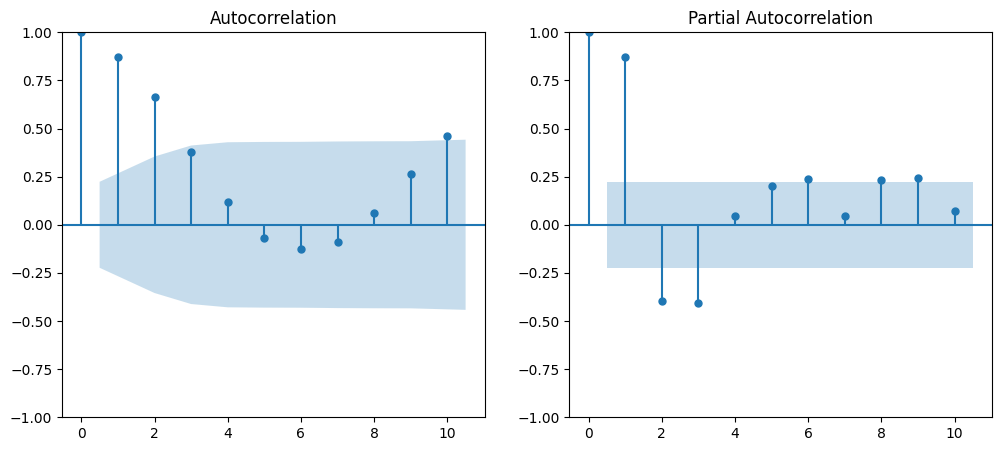

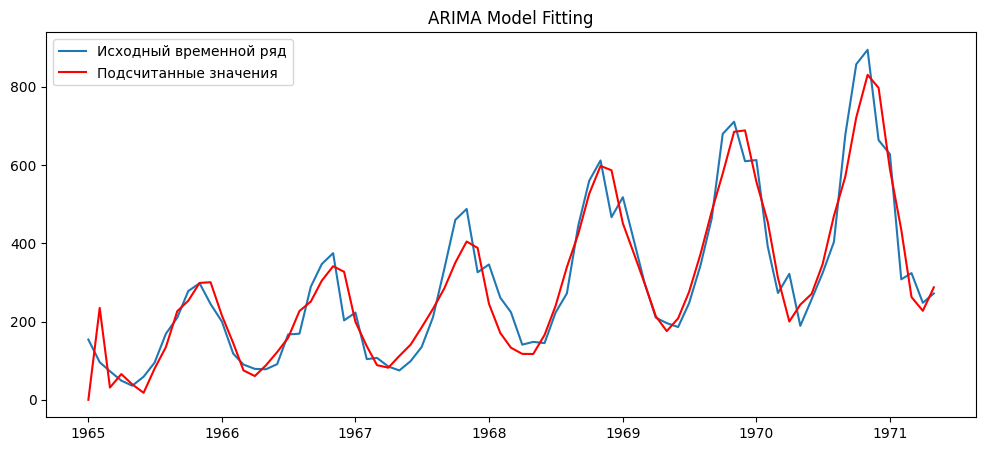

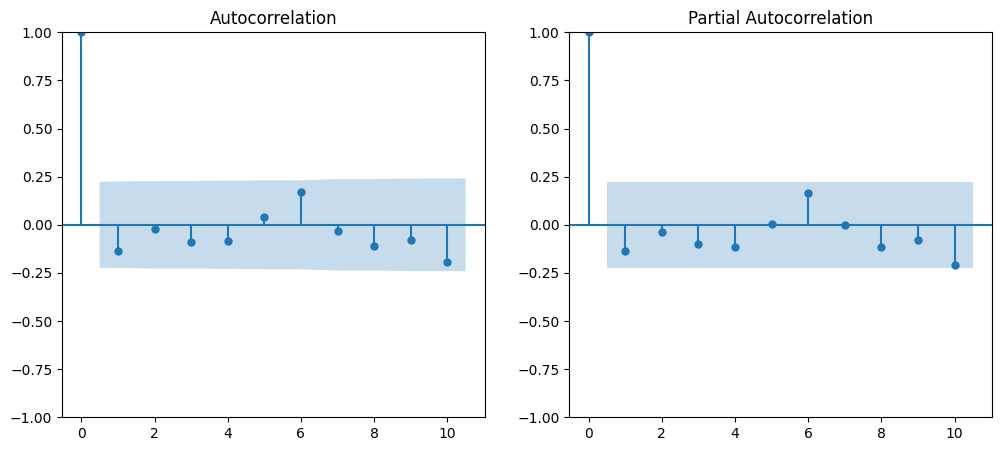

In [ ]:
# Построение графиков ACF и PACF
max_lags = min(10, len(ts) // 2 - 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(ts, lags=max_lags, ax=ax[0])
sm.graphics.tsa.plot_pacf(ts, lags=max_lags, ax=ax[1])
plt.show()

# Прогнозирование с использованием найденной модели
plt.figure(figsize=(12, 5))
plt.plot(ts, label='Исходный временной ряд')
plt.plot(best_model.fittedvalues, color='red', label='Подсчитанные значения')
plt.title('ARIMA Model Fitting')
plt.legend()
plt.show()

# Вывод графиков ACF и PACF для модельных значений
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sm.graphics.tsa.plot_acf(best_model.resid, lags=max_lags, ax=ax[0])
sm.graphics.tsa.plot_pacf(best_model.resid, lags=max_lags, ax=ax[1])
plt.show()

**Работа с остатками**

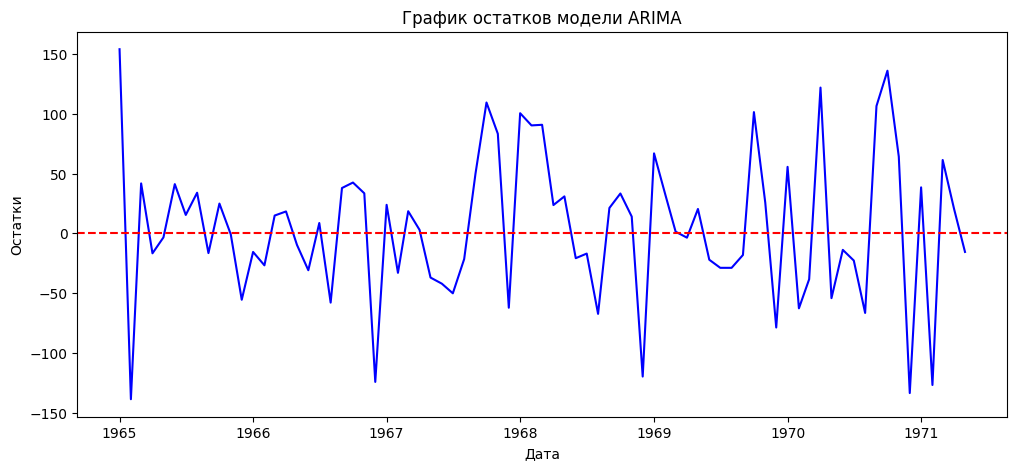

In [ ]:
# Вычисление остатков модели
residuals = best_model.resid

# Построение графика остатков
plt.figure(figsize=(12, 5))
plt.plot(residuals, color='blue')
plt.title('График остатков модели ARIMA')
plt.xlabel('Дата')
plt.ylabel('Остатки')
plt.axhline(0, linestyle='--', color='red')
plt.show()

**Построение модели GARCH на остатках**

Iteration:      1,   Func. Count:     13,   Neg. LLF: 425.3447768752279
Iteration:      2,   Func. Count:     26,   Neg. LLF: 424.36442529685405
Iteration:      3,   Func. Count:     39,   Neg. LLF: 421.7830708987377
Iteration:      4,   Func. Count:     51,   Neg. LLF: 424.87059882216073
Iteration:      5,   Func. Count:     64,   Neg. LLF: 421.05620581271035
Iteration:      6,   Func. Count:     76,   Neg. LLF: 421.0087108087635
Iteration:      7,   Func. Count:     88,   Neg. LLF: 420.9883524873293
Iteration:      8,   Func. Count:    100,   Neg. LLF: 420.98062068604867
Iteration:      9,   Func. Count:    112,   Neg. LLF: 420.94706582894935
Iteration:     10,   Func. Count:    124,   Neg. LLF: 420.8977163112911
Iteration:     11,   Func. Count:    136,   Neg. LLF: 420.89736882825156
Iteration:     12,   Func. Count:    148,   Neg. LLF: 420.8972793172023
Iteration:     13,   Func. Count:    160,   Neg. LLF: 420.8972770780462
Iteration:     14,   Func. Count:    172,   Neg. LLF: 420.

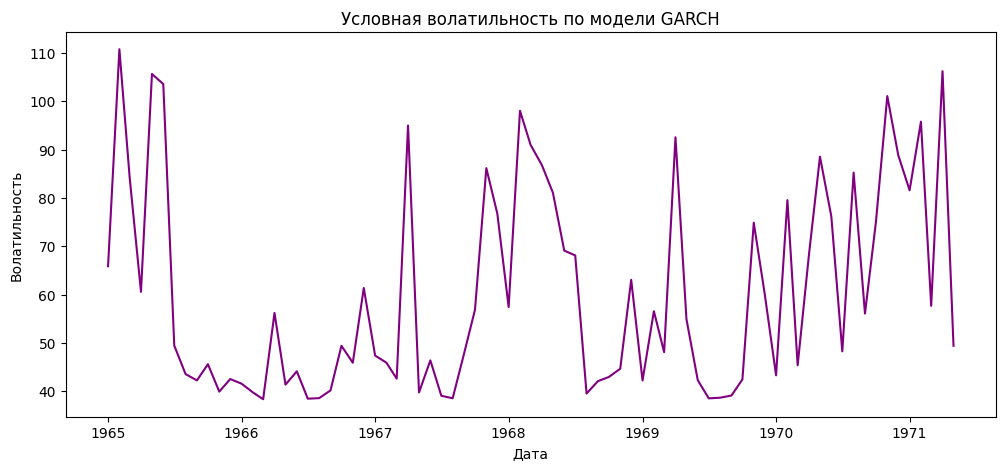

In [ ]:
model_garch = arch_model(residuals, vol='Garch', p=4, o=2, q=3)
results_garch = model_garch.fit()

print(results_garch.summary())

# Построение графика условной волатильности
plt.figure(figsize=(12, 5))
plt.plot(results_garch.conditional_volatility, color='purple')
plt.title('Условная волатильность по модели GARCH')
plt.xlabel('Дата')
plt.ylabel('Волатильность')
plt.show()

In [ ]:
# Проверка стационарности остатков модели GARCH
print("Тест Дики-Фуллера для остатков модели GARCH:")
test_stationarity(results_garch.resid)

Тест Дики-Фуллера для остатков модели GARCH:
ADF Statistic: -1.9104582318397136
p-value: 0.3271573358772314
Временной ряд нестационарен.


Видим, что ряд остатков не является стационарным. Постараемся добиться стационарности

**Приведение к стационарности**

Попробуем взять первое различие остатков.

In [ ]:
differenced_residuals = residuals.diff().dropna()
print("Тест Дики-Фуллера для скорректированных остатков:")
test_stationarity(differenced_residuals)

Тест Дики-Фуллера для скорректированных остатков:
ADF Statistic: -5.584698263358373
p-value: 1.3713703497995805e-06
Временной ряд стационарен.


Видим, что данное решение помогло.

Применим логарифмирование значений.

In [ ]:
log_residuals = np.log(np.abs(residuals) + 1)  # Используйте abs() и добавьте 1, чтобы избежать отрицательных значений.
test_stationarity(log_residuals)

ADF Statistic: -6.432397836872851
p-value: 1.6847699111518114e-08
Временной ряд стационарен.


Видим, что данное решение также помогло.

Применим преобразование корня.

In [ ]:
sqrt_residuals = np.sqrt(np.abs(residuals))
test_stationarity(sqrt_residuals)

ADF Statistic: -4.516677620364781
p-value: 0.00018343650378447853
Временной ряд стационарен.


Данное решение аналогично помогло.

**Выводы**

Не смотря на то, что оптимальные параметры для модели ARIMA не смогли сделать ряд модели GARCH стационарным, применение сторонних методов помогло исправить эту ситуацию.